In [19]:
import json
import multiprocessing
import hashing.lsh_main as lsh
# import graph.graph_main as graph
import time
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import graph.random_walk_ori as random_walk
import pandas as pd
import lshashpy3 as lshash


In [20]:
num_cores = multiprocessing.cpu_count()
import multiprocessing
from joblib import Parallel, delayed


In [21]:
data = pd.read_csv('Electric.csv')
df_ori = data[:15000]

In [22]:
window = 3000

df_fake = [df_ori['Electric'][i:i + window].tolist() for i in range(0, len(df_ori) - window, 500)]
df_fake = pd.DataFrame(df_fake)
df_fake = df_fake.T

noise = np.random.normal(0,10,len(df_fake[0]))
df_fake_noise = []
for li in df_fake: 
    df_fake_noise.append(df_fake[li].tolist() + noise)
    
df_fake_noise = pd.DataFrame(df_fake_noise)
df_fake_noise = df_fake_noise.T

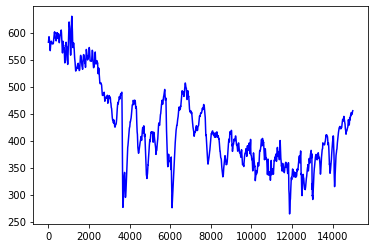

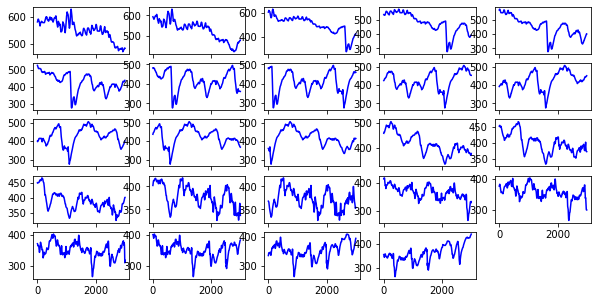

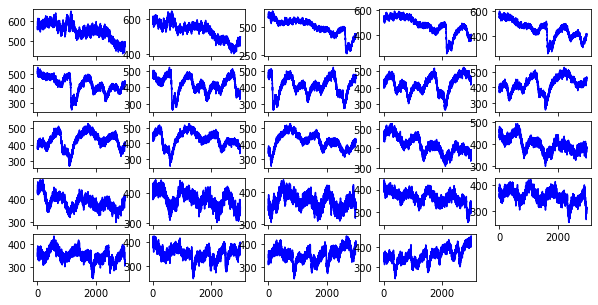

In [23]:
df_ori.plot(legend = False, c = 'b')
plt.show()

df_fake.plot(subplots=True, layout=(5,5), figsize=(10, 5), legend = False, color = 'b')
plt.show()

df_fake_noise.plot(subplots=True, layout=(5,5), figsize=(10, 5), legend = False, color = 'b')
plt.show()


In [24]:
def generate(df_ori, df_fake, top_n, n_HT, p_HT):
    lsh_arr = lshash.LSHash(int(window * p_HT), window,
            num_hashtables=n_HT)
    return 0

In [25]:
generate(df_ori, df_fake, top_n=3, n_HT=10, p_HT=0.1)

0

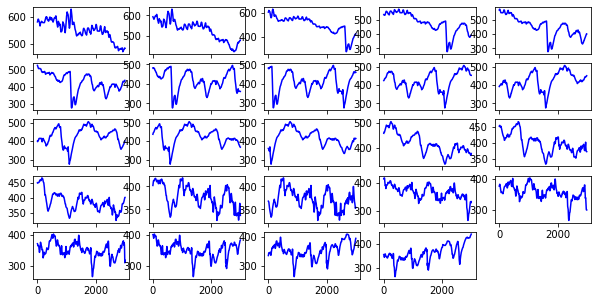

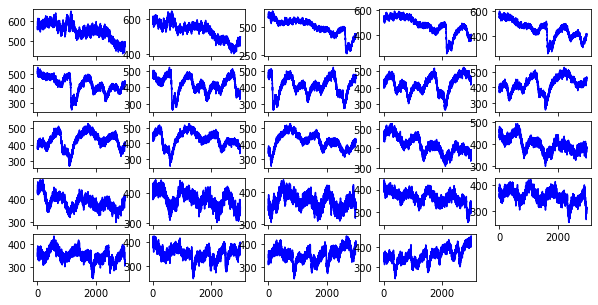

In [26]:
lsh = lshash.LSHash(100, 3000, num_hashtables=8)

for i in df_fake:
    lsh.index(df_fake_noise[i].tolist())
    
df_query = [list(lsh.query(df_fake[i].tolist())[0][0][0]) for i in df_fake]

df_query = pd.DataFrame(df_query)
df_query = df_query.T

df_fake.plot(subplots=True, layout=(5,5), figsize=(10, 5), legend = False, color = 'b')
plt.show()

df_query.plot(subplots=True, layout=(5,5), figsize=(10, 5), legend = False, color = 'b')
plt.show()


In [27]:
to_query = [df_ori['Electric'][i:i + window].tolist() for i in range(0, len(df_ori) - 3000, 3000)]


In [31]:
res = [lsh.query(to_query[i])[0][0][0] for i in range(len(to_query))]

In [33]:
res0 = []
for l in res: 
    res0 += l

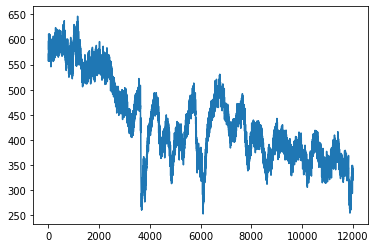

In [34]:
plt.plot(res0)
plt.show()

In [ ]:
ack